$\Huge How$ $\hspace{0.1cm}$ $\Huge to$ $\hspace{0.1cm}$ $\Huge use$ $\hspace{0.1cm}$ $\Huge CAMB$ $\Huge :$ 

# TO DO : 

1. Add the tensor file study

# Modules : 

In [1]:
import healpy as hp
import matplotlib.pyplot as plt 
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
from astropy.io import fits
import numpy as np
import fbasic as fb

# Code : 

## Plot the power spectra 

In [2]:
def CAMB_PS(data_path,file_name,i,nside): 
    
        
    """
    Function which compute a CMB map from a power spectrum.

    Parameters
    ----------
    
    data_path : str
        Path were the data of the maps are stored and we the cutout are going to be stored. 
    file_name : str
        Name of the .dat contaning the values of the power spectrum given by CAMB.
    i : integer 
        Column number we want to plot. 
    nside : int
        Resolution of the map. The power spectrum will go until l = 3 * nside -1.
        
    Returns
    -------
    array
        Array containing the power spectrum 

    """
    
    #Load the datas : 
    data = np.loadtxt(data_path + file_name)
    TT_data = data[:,i] # Take only the first column, which is the temperature T

    #Vairables : 
    ell = data[:,0].astype(int)
    ellfactor = ell*(ell+1)/(2.*np.pi) #Array containing all the values of the factor used in CMB science 

    TT = TT_data #/ ellfactor #The file given by CAMB is the power spectrum multiplied by this factor 
    #Because the monopole and dipole are not in the data of the power spectrum given by CAMB we need to add them back
    #They need to be 0 because we usually remove them no to influence our studies. 
    TT_1 = np.insert(TT,0,0)
    TT_final = np.insert(TT_1,0,0)
    
    return TT_final

## Get fixed $a_{lm}$

In [10]:
def camb2alm(TT,TE,EE,BB):
    
    """
    Function which return fixed alm for given power spectrums.
    From : Akhilesh 

    Parameters
    ----------
    
    TT : Array
        Array containing the power spectrum of the temperature.
    TE : Array
        Array containing the cross-correlation between T and E. 
    EE : Array
        Array containing the power spectrum of the E polarization. 
    BB : Array
        Array containing the power spectrum of the B polarization.
        
    Returns
    -------
    array
        Array containing fixed alm of the TT,EE and BB power spectra.

    """
    
    c_ells = [TT,TE,EE,BB]
    TT_alm, TE_alm, EE_alm = hp.synalm(c_ells,new = False)
    
    return TT_alm, TE_alm, EE_alm

# Datas : 

## Scalar output 

Composition of Scalar Output files : 

     l         TT           EE              TE              ?             ?

     2    0.12080E+04    0.53043E-01    0.34680E+01    0.10830E+07    0.34120E+05
     3    0.11253E+04    0.86934E-01    0.43602E+01    0.16669E+07    0.40489E+05
     4    0.10487E+04    0.97872E-01    0.44888E+01    0.21839E+07    0.43433E+05
     5    0.98979E+03    0.86792E-01    0.41639E+01    0.26396E+07    0.44561E+05
     6    0.94705E+03    0.63939E-01    0.36265E+01    0.30412E+07    0.44680E+05
     7    0.91736E+03    0.40452E-01    0.30287E+01    0.33965E+07    0.44240E+05

In [3]:
ell =np.arange(0,3*512-1)
ellfactor = ell*(ell+1)/(2.*np.pi)

### TT first colum : 

In [4]:
TT = CAMB_PS(data_path='/vol/aibn1118/data1/mcharmetant/Data/CAMB/',file_name='Aki_CAMB.txt',i=1,nside=512)

### EE second column : 

In [5]:
EE = CAMB_PS(data_path='/vol/aibn1118/data1/mcharmetant/Data/CAMB/',file_name='Aki_CAMB.txt',i=2,nside=512)

### TE third column : 

In [6]:
TE = CAMB_PS(data_path='/vol/aibn1118/data1/mcharmetant/Data/CAMB/',file_name='Aki_CAMB.txt',i=3,nside=512)

### BB : 

In [7]:
BB = CAMB_PS(data_path='/vol/aibn1118/data1/mcharmetant/Data/CAMB/',file_name='Aki_CAMB.txt',i=4,nside=512)

# Test : 

In [20]:
TT_alm, EE_alm, BB_alm = camb_to_alm(TT,TE,EE,BB)

/users/mcharmetant/anaconda3/lib/python3.6/site-packages/healpy/sphtfunc.py:395: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


In [32]:
PS = hp.alm2cl([EE_alm,TT_alm])

## TT : 

/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


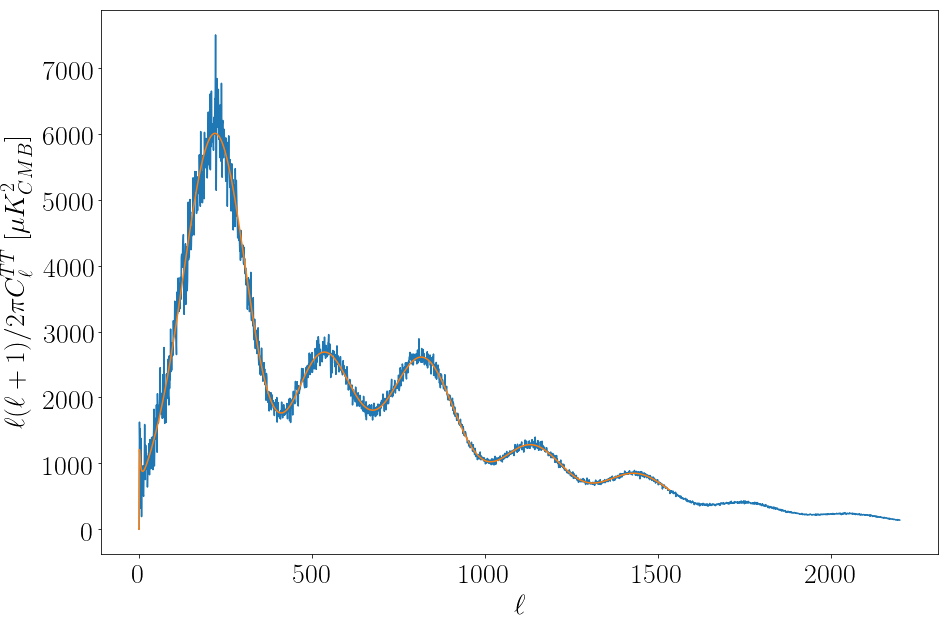

In [41]:
fig, ax = plt.subplots()
ax.plot(PS[1],'-',label='$Reconstructed$')
ax.plot(ell,TT[ell],'-',label='$Theoretical$')
ax.set_xlabel('$\ell$',fontsize=28)
ax.set_ylabel('$\ell(\ell+1)/2\pi C_{\ell}^{TT}$ $[\mu K_{CMB}^{2}]$',fontsize=28) 
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

### CMB map from the fixed $a_{lm}$

In [42]:
TT_map = hp.alm2map(alms=TT_alm, nside=512, lmax=None, mmax=None, pixwin=False, fwhm=0.0,
           sigma=None, pol=True, inplace=False, verbose=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


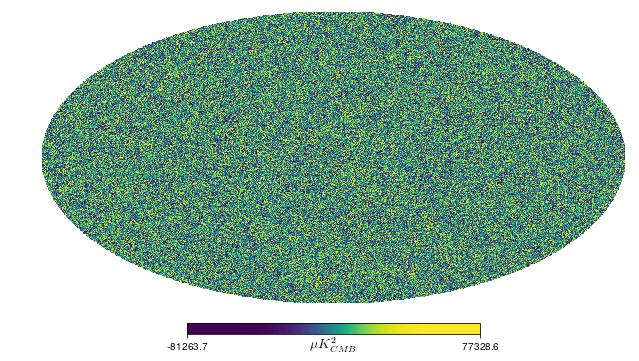

In [43]:
hp.mollview(map=TT_map,coord=None, nest=False, title='', unit='$\mu K_{CMB}^{2}$', norm='hist')

### CMB map from the cls : 

In [44]:
TT_map_cl = hp.synfast(cls=PS[1], nside=512, lmax=None, mmax=None, alm=False, pol=True, pixwin=False, fwhm=0.0,
           sigma=None, new=False, verbose=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/users/mcharmetant/anaconda3/lib/python3.6/site-packages/healpy/sphtfunc.py:395: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


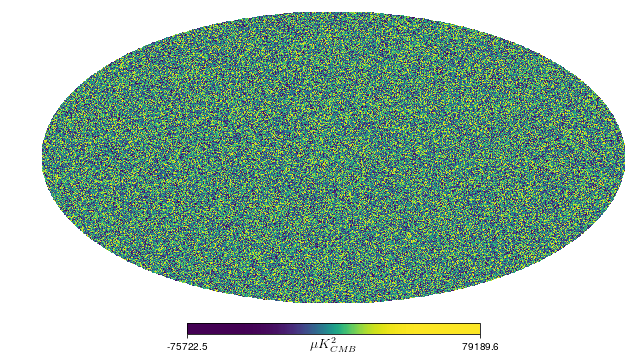

In [45]:
hp.mollview(map=TT_map_cl,coord=None, nest=False, title='', unit='$\mu K_{CMB}^{2}$', norm='hist')

## TE : 

/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


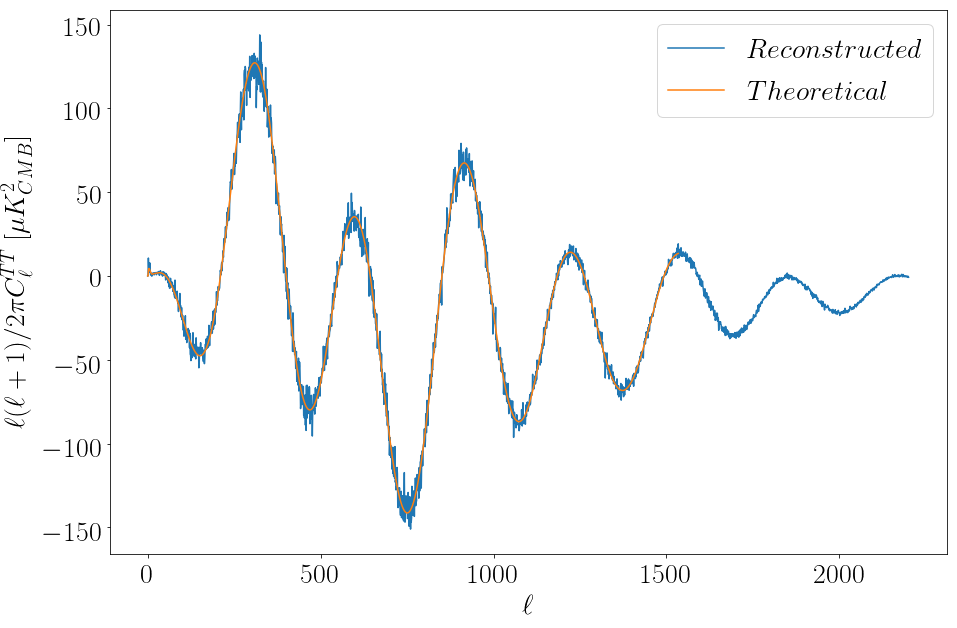

In [34]:
fig, ax = plt.subplots()
ax.plot(PS[2],'-',label='$Reconstructed$')
ax.plot(ell,TE[ell],'-',label='$Theoretical$')
ax.set_xlabel('$\ell$',fontsize=28)
ax.set_ylabel('$\ell(\ell+1)/2\pi C_{\ell}^{TT}$ $[\mu K_{CMB}^{2}]$',fontsize=28) 
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=28)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

## EE : 

/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


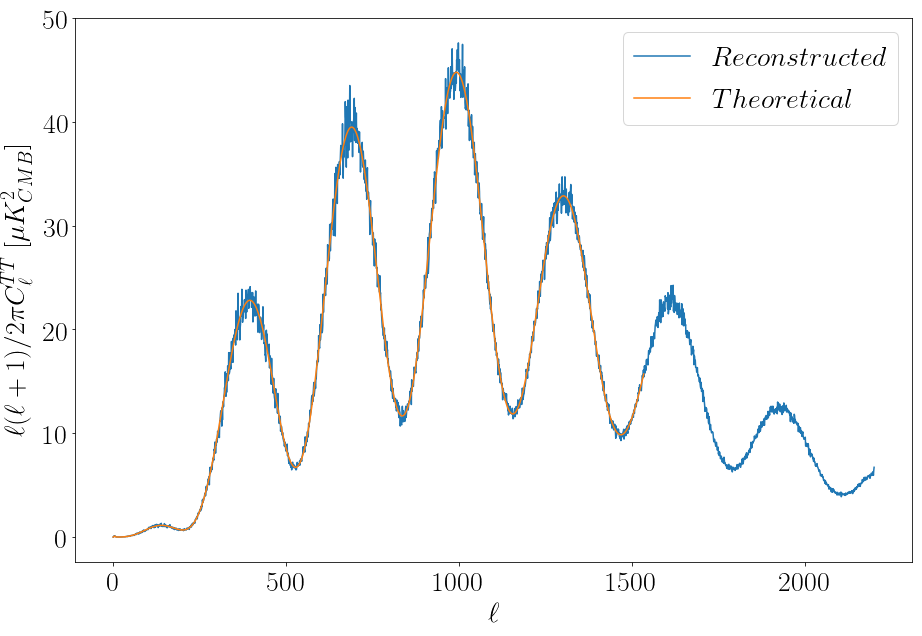

In [46]:
fig, ax = plt.subplots()
ax.plot(PS[0],'-',label='$Reconstructed$')
ax.plot(ell,EE[ell],'-',label='$Theoretical$')
ax.set_xlabel('$\ell$',fontsize=28)
ax.set_ylabel('$\ell(\ell+1)/2\pi C_{\ell}^{TT}$ $[\mu K_{CMB}^{2}]$',fontsize=28) 
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=28)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()